In [ ]:
! pip install Ultralytics 

# Object detection

In [6]:
from ultralytics import YOLO

# pretrained models
#  	 Detection ,   Kind
#    yolov8n.pt,	 Nano
#  	yolov8s.pt,	 	 Small
# 	yolov8m.pt,	  Medium
#  	yolov8l.pt,	  Large
#  	yolov8x.pt,	 Huge

In [23]:
!yolo task = detect mode=predict model = yolov8m.pt source='/content/group.jpeg'

Ultralytics YOLOv8.0.96 🚀 Python-3.10.11 torch-2.0.0+cu118 CPU
YOLOv8m summary (fused): 218 layers, 25886080 parameters, 0 gradients, 78.9 GFLOPs

image 1/1 /content/group.jpeg: 448x640 5 persons, 1 handbag, 1 potted plant, 1 dining table, 2 laptops, 707.6ms
Speed: 4.2ms preprocess, 707.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


In [13]:
model = YOLO("yolov8m.pt")
results = model.predict("/content/group.jpeg")


image 1/1 /content/group.jpeg: 448x640 5 persons, 1 handbag, 1 potted plant, 1 dining table, 2 laptops, 726.8ms
Speed: 2.3ms preprocess, 726.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


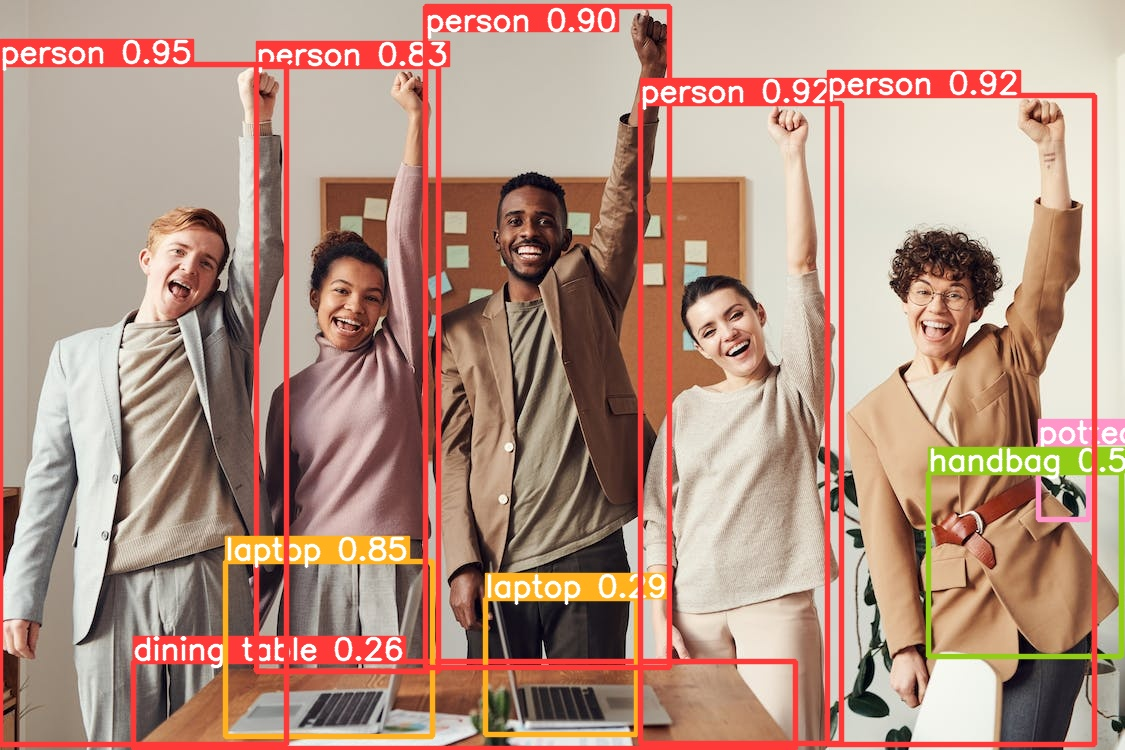

# As we provided only a single image, it returns an array with a single item that you can extract like this

In [25]:
result = results[0]
print(result)

ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: None
keys: ['boxes']
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'c

In [26]:
print(len(result.boxes))

10


# Then you can analyze each box either in a loop or manually. Let's get the first one

In [27]:
box = result.boxes[0]
print(box)

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.yolo.engine.results.Boxes object with attributes:

boxes: tensor([[  0.0000,  64.5071, 286.1759, 744.8614,   0.9462,   0.0000]])
cls: tensor([0.])
conf: tensor([0.9462])
data: tensor([[  0.0000,  64.5071, 286.1759, 744.8614,   0.9462,   0.0000]])
id: None
is_track: False
orig_shape: tensor([ 750, 1125])
shape: torch.Size([1, 6])
xywh: tensor([[143.0879, 404.6842, 286.1759, 680.3543]])
xywhn: tensor([[0.1272, 0.5396, 0.2544, 0.9071]])
xyxy: tensor([[  0.0000,  64.5071, 286.1759, 744.8614]])
xyxyn: tensor([[0.0000, 0.0860, 0.2544, 0.9931]])


In [17]:
print("Object type:", box.cls)
print("Coordinates:", box.xyxy)
print("Probability:", box.conf)

Object type: tensor([0.])
Coordinates: tensor([[  0.0000,  64.5071, 286.1759, 744.8614]])
Probability: tensor([0.9462])


In [18]:
print("Object type:",box.cls[0])
print("Coordinates:",box.xyxy[0])
print("Probability:",box.conf[0])

Object type: tensor(0.)
Coordinates: tensor([  0.0000,  64.5071, 286.1759, 744.8614])
Probability: tensor(0.9462)


In [19]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 0.0
Coordinates: [0.0, 64.5071029663086, 286.1758728027344, 744.8613891601562]
Probability: 0.9462137818336487


In [20]:
print(result.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

# In this code I rounded all coordinates using Python list comprehension. Then I got the name of the detected object class by ID using the result.names dictionary. I also rounded the probability 

In [21]:
cords = box.xyxy[0].tolist()
cords = [round(x) for x in cords]
class_id = result.names[box.cls[0].item()]
conf = round(box.conf[0].item(), 2)
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: person
Coordinates: [0, 65, 286, 745]
Probability: 0.95


# This data is good enough to show in the user interface. Let's now write some code to get this information for all detected boxes in a loop

In [22]:
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: person
Coordinates: [0, 65, 286, 745]
Probability: 0.95
---
Object type: person
Coordinates: [827, 95, 1095, 745]
Probability: 0.92
---
Object type: person
Coordinates: [640, 104, 841, 744]
Probability: 0.92
---
Object type: person
Coordinates: [426, 7, 670, 668]
Probability: 0.9
---
Object type: laptop
Coordinates: [226, 561, 433, 737]
Probability: 0.85
---
Object type: person
Coordinates: [257, 67, 438, 671]
Probability: 0.83
---
Object type: handbag
Coordinates: [929, 472, 1122, 656]
Probability: 0.59
---
Object type: potted plant
Coordinates: [1039, 444, 1088, 520]
Probability: 0.34
---
Object type: laptop
Coordinates: [485, 599, 637, 735]
Probability: 0.29
---
Object type: dining table
Coordinates: [133, 661, 795, 748]
Probability: 0.26
---
